## BoomBikes Case Study

#### Problem Statement:

BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially, the company wants —


- To identify the variables used by the management to understand how exactly the demands vary with different features

- To create a linear model that will meet the demand levels and meet the customer's expectations

- Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Boom Bikes dataset

In [126]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [127]:
import numpy as np
import pandas as pd

In [128]:
BoomBike = pd.read_csv("day.csv")

In [129]:
# Check the head of the dataset
BoomBike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Droping Unnessary Data

- Instant :  Its just an continous numerical value that does not add up any value
- dteday  : The important information is already given like mnth , year, holiday etc so there is nothing  to extract much information from dteday 
- casual , registered : these two columns sum up to give cnt to avoid data leckage we drop these two columns which are not helpful to predict the demand


In [130]:
BoomBike = BoomBike.drop(["instant","dteday","casual","registered"], axis=1)

In [131]:
BoomBike.shape

(730, 12)

In [132]:
BoomBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [133]:
BoomBike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

**understanding the data**.
- If there are some  multicollinearity ,we can find at first place
- we can find strong correlation features grafically between the independent and dependent variable 

We'll visualise our data using `matplotlib` and `seaborn`.

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Ploting which are continuous variables 
- temp, atemp,  hum,windspeed ,cnt

 

In [135]:
Numerical_data = BoomBike[["temp" , "atemp" , "hum" , "windspeed" , "cnt"]]

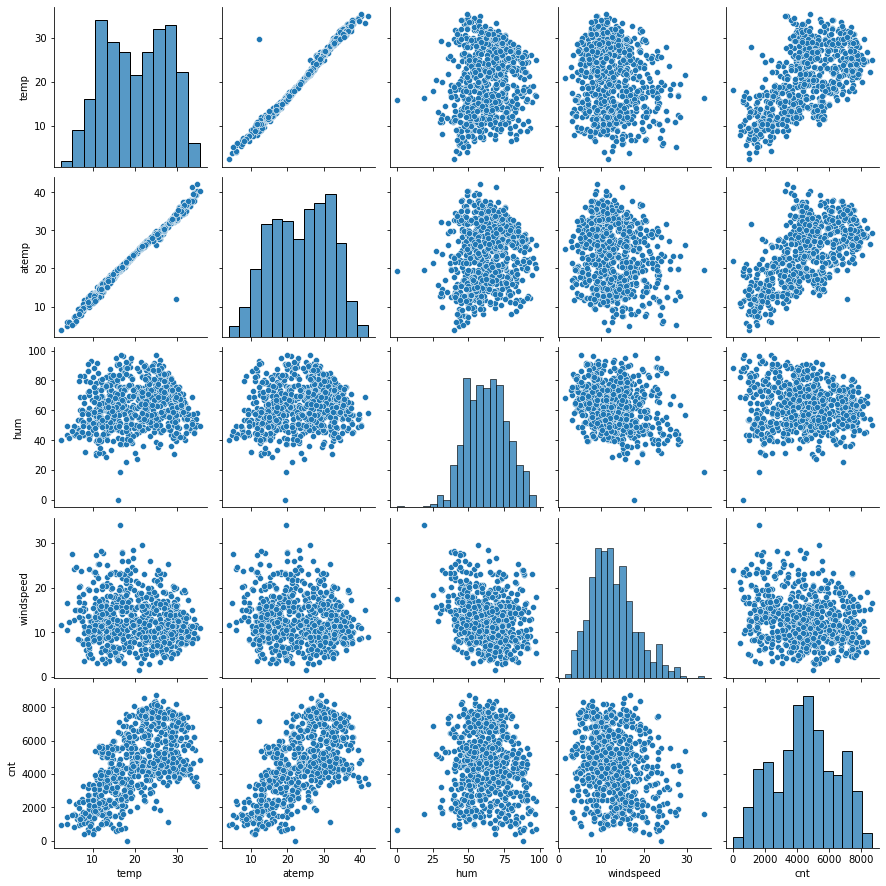

In [136]:
sns.pairplot(Numerical_data)
plt.show()

## Insights :
- As the temp, atemp incresses the cnt also incresses 
- there is high correlation between atemp and temp

In [137]:
Categorical_data = BoomBike[["season","yr","mnth","holiday","weekday","workingday","weathersit"]]

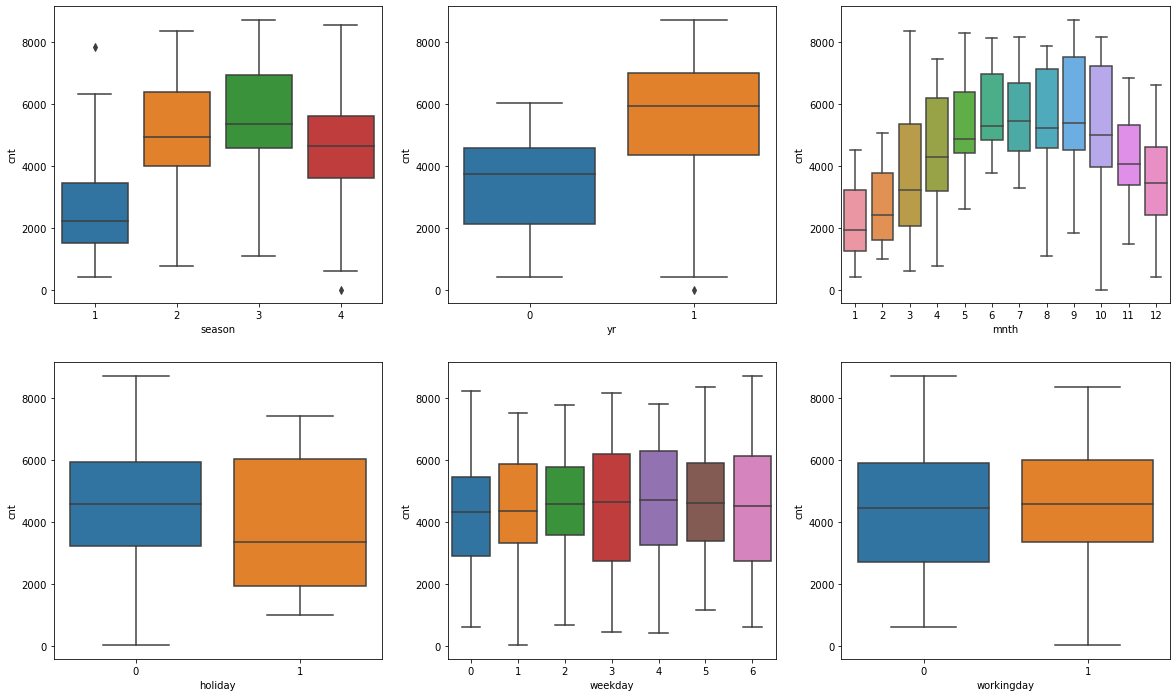

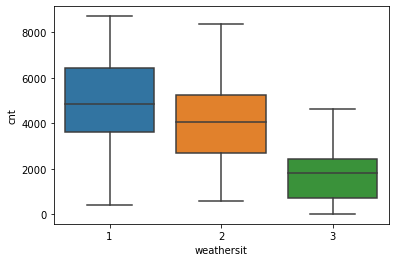

In [138]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BoomBike)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = BoomBike)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = BoomBike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = BoomBike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = BoomBike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = BoomBike)
plt.show()
sns.boxplot(x = 'weathersit', y = 'cnt', data = BoomBike)
plt.show()

## Insights :
 - From season and cnt graph we can say 2,3 season are affecting the cnt(are higher than the 1,4)
 - In 2nd year there were more bikes were taken for rent 
 - In Middle of the year there are high bike for rent are taken (there might be holidays for students like semester gap)
 - In Holidays people are more likely to take bike for rent 
 - Sat,Sun, Wed are more booking done compared to other days
 - if the weather is clear , mist and cloudy there more likely to take bikes for rent 

### By observing EDA 
- temp is highly correlated to cnt so its imp variable 
- months(jun , july) , Season (summer, fall) , weatersit (clear , mist and cloudy) , holiday , year  these all varaibles can influence the booking of rentel bikes 


## Step 3: Data Preparation

### As Some Features is given in numbers we need to encode them as categorical 
- These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case 

In [139]:
### Converting some numeric values to categorical data
## maping seasons
BoomBike.season = BoomBike.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

## mapping weathersit
BoomBike.weathersit = BoomBike.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
## mapping weekdays 
BoomBike.weekday = BoomBike.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

##mapping months 
import calendar
BoomBike['mnth'] = BoomBike['mnth'].apply(lambda x: calendar.month_abbr[x])

### Dummy Variables
- create a dummy variables for month , season , weather ,weekday 
- by removing first columns as n-1 columns are required for any dummy variables 

In [140]:
dummy_varables = BoomBike[["season",'weathersit','mnth','weekday']]

In [141]:
status = pd.get_dummies(dummy_varables, drop_first = True)#n-1 columns for each feature

In [142]:
# Add the results to the original BoomBike dataframe

BoomBike = pd.concat([BoomBike, status], axis = 1)

In [143]:
# Drop  "season" , "weathersit" ,'mnth','weekday' as we have created the dummies for it

BoomBike.drop(["season",'weathersit','mnth','weekday' ], axis = 1, inplace = True)

In [144]:
BoomBike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [145]:
BoomBike.shape 

(730, 30)

## Step 4: Splitting the Data into Training and Testing Sets

In [146]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(BoomBike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Feature scaling in MinMax 

In [147]:
from sklearn.preprocessing import MinMaxScaler

In [148]:
scaler = MinMaxScaler()

In [150]:
# Apply scaler() to all the columns 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [151]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0


## Correlations 

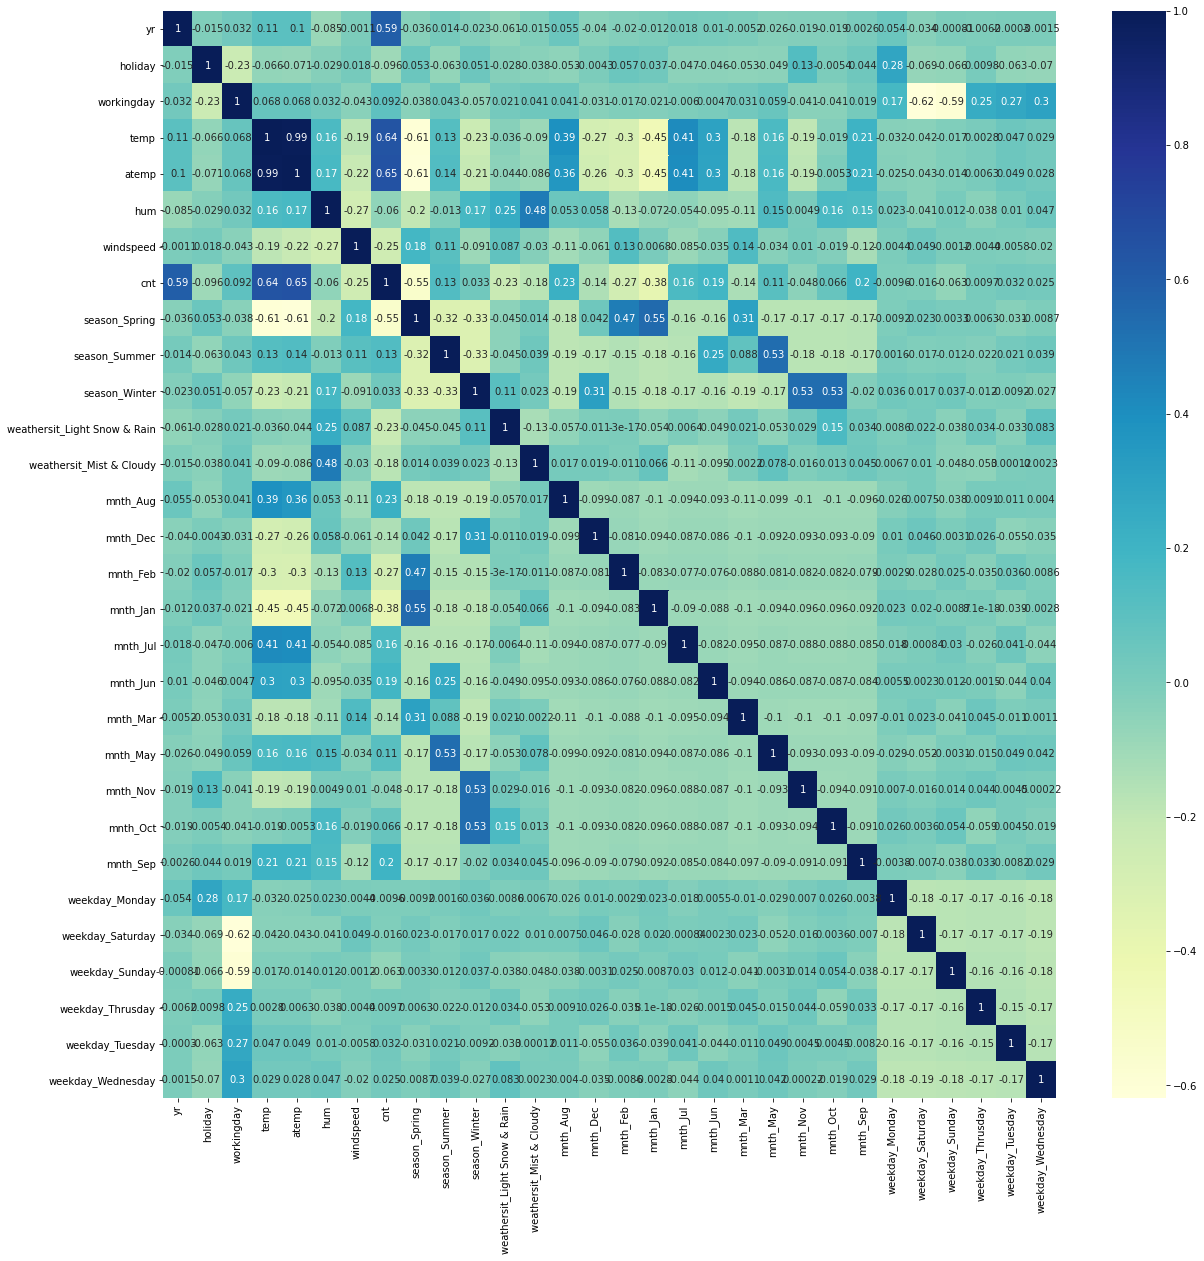

In [152]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [153]:
df_train.corr()[["cnt"]]

,cnt
yr,0.591508
holiday,-0.095961
workingday,0.092320
temp,0.643517
atemp,0.646475
hum,-0.059993
windspeed,-0.253794
cnt,1.000000
season_Spring,-0.548871
season_Summer,0.134343


### Dividing into X and Y sets for the model building

In [154]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model
- First we will apply RFE to select the top 13 features 
- Then we will create the model with 13 features
- Then by comparing significance and vif we will drop one featue again we build the model 
- Until p < 0.05 and Vif < 5 

In [155]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [156]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [157]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 5),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 9),
 ('season_Winter', True, 1),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 15),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 4),
 ('mnth_Sep', False, 16),
 ('weekday_Monday', False, 11),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 10),
 ('weekday_Thrusday', False, 13),
 ('weekday_Tuesday', False, 12),
 ('weekday_Wednesday', False, 14)]

### List of Features given by RFE

In [59]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep'],
      dtype='object')

### List of Features that are dropped by RFE

In [158]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'atemp', 'season_Summer', 'mnth_Aug',
       'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct', 'mnth_Sep',
       'weekday_Monday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [159]:
# Creating X_test dataframe with RFE selected variables
X_train = X_train[col]

In [160]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train = sm.add_constant(X_train)

In [161]:
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

In [162]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.67e-188
Time:                        16:51:45   Log-Likelihood:                 507.55
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     496   BIC:                            -927.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Checking VIF

In [163]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [164]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.62
3,temp,3.22
6,season_Spring,2.75
7,season_Winter,2.12
4,hum,1.89
9,weathersit_Mist & Cloudy,1.56
10,mnth_Jan,1.55
12,mnth_Nov,1.47
11,mnth_Jul,1.31
8,weathersit_Light Snow & Rain,1.24


<b>Here we can see the vif for all the variable are less than 5 but `p-value` of `month_nov` is bit high that is
`0.07 > 0.05` so we try to drop the month nov and run the model again

### Dropping the variable and updating the model

In [165]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('mnth_Nov', 1,)

In [166]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [167]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.5
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          5.52e-189
Time:                        16:55:19   Log-Likelihood:                 505.89
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     497   BIC:                            -930.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [168]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,60.97
3,temp,3.18
6,season_Spring,2.72
4,hum,1.89
7,season_Winter,1.81
9,weathersit_Mist & Cloudy,1.56
10,mnth_Jan,1.55
11,mnth_Jul,1.30
8,weathersit_Light Snow & Rain,1.24
5,windspeed,1.19


- <b>Jan month has p value 0.02 < 0.05 so no need to drop any variable as all are significant and vif is also low for all the varables </b> 
- <b>Having good `r2_score` of `84` and `f-satistics` also says this model is better than before one `201 < 217` 
- we consider this model as a final model
                                                                                                       

## Step 6: Residual Analysis of the train data


In [169]:
y_train_price = lr_2.predict(X_train_lm)

Text(0.5, 0, 'Errors')

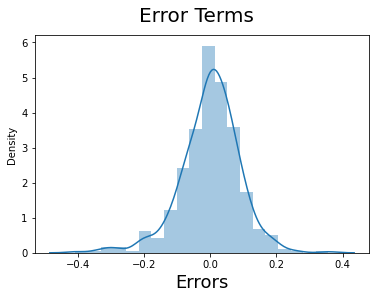

In [170]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### error terms are in normally distributed (which is infact, one of the major assumptions of linear regression)

## Step 7: Making Predictions Using the Final Model

#### Applying the scaling on the test sets

In [171]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [75]:
y_test = df_test.pop('cnt')
X_test = df_test

In [172]:
# Adding constant variable to test dataframe
X_test_m2 = sm.add_constant(X_test)

In [173]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m2

X_test_m2 = X_test_m2.drop(['workingday', 'atemp', 'season_Summer', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday','mnth_Nov'], axis = 1)

In [174]:
# Making predictions using the second model

y_pred_m4 = lr_2.predict(X_test_m2)

In [175]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.814221074227889

### Model is having `r2_score` of `0.81` on `test data` which is near to `r2_score` of `train data` that is `0.84`

## Step 8: Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

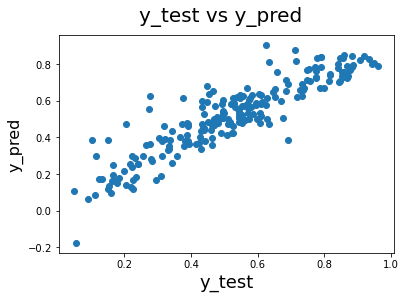

In [176]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [84]:
param = pd.DataFrame(lr_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,13))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param


,Variables,Coefficient value
index,,
3,temp,0.464398
0,const,0.347361
1,yr,0.231141
12,mnth_Sep,0.061767
7,season_Winter,0.052938
10,mnth_Jan,-0.038877
9,weathersit_Mist & Cloudy,-0.055578
11,mnth_Jul,-0.076860
2,holiday,-0.097329



We can see that the equation of our best fitted line is:

$ cnt = 0.464  \times  temp + 0.2311  \times yr + 0.0617 \times mnth_Sep + 0.0529 \times season_Winter
- 0.0388\times mnth_Jan - 0.0556 \times weathersit_Mist _Cloudy - 0.0768 \times mnth_Jul - 0.0973 \times holiday 
- 0.098 \times season_spring - 0.154 \times hum  - 0.177 \times windspeed - 0.245 \times weathersit_Light Snow_Rain $


- <b>All the positive coefficients like temp , yr indicate that an increase in these values will lead to an increase in the value of cnt.
- <b> All the negative coefficients  indicate that an increase in these values will lead to an decrease in the value of cnt. 

### Insights
- temp is the most key factor for booking the bikes for retal its weights is `0.464` 
- Season also effects the booking
- humidity , windspeed , weather are negtively impacts on booking (as if there is high windspeed then there will be less bookings)
